In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
apples = pd.read_csv('https://raw.githubusercontent.com/ElijahSum/mipt_visualization/master/week_03_visualization/apple_quality.csv')
apples.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


# Задача 1. Сравнение качества работы kNN при разных параметрах k
На лекциях и семинарах мы разбирали возможности для применения стандартных библиотек при работе с алгоритмом kNN. Мы также обращали внимание, что существует большое количество кастомных библиотек для создания более тонкой и кастомной визуализации. Одна из них — библиотека mlxtend.plotting.

Эта библиотека позволяет создавать удобные визуализации работы алгоритмов машинного обучения. В ней есть функция plot_decision_regions, которая позволяет создавать визуализации для алгоритмов классификации.



## Задача 1.1 (2 балла)
Напишите функцию, которая будет:

Отбирать все числовые признаки в датасете.
Перебирать все сочетания по два признака (без повторений) и запускать для каждой пары признаков алгоритм kNN (с k = 10). Для каждой итерации необходимо считать accuracy. Зависимая переменная  указывается отдельно при подаче в функцию.
Возвращает названия двух признаков, которые дали наибольший accuracy score. Если accuracy score совпадают для двух или нескольких пар, верните первую найденную вами пару.
Прототип может выглядеть примерно так:

```
def knn_two_features(df, y):
  '''
  df - датасет, который мы подаем для перебора алгоритмов
  y - зависимая переменная (класс признаков), которую мы хотим предсказать
  '''

  ...

  return [first_feature, second_feature]

```

In [ ]:
apples.isna().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
apples = apples.dropna(axis=0)

In [ ]:
apples.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 312.5+ KB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from itertools import combinations

def knn_two_features(df, y):
    numeric_features = df.select_dtypes(include=[np.number]).columns

    feature_combinations = list(combinations(numeric_features,  2))

    best_accuracy =  0
    best_features = None

    X_train, X_test, y_train, y_test = train_test_split(df[numeric_features], df[y], test_size=0.2, random_state=42)

    for features in feature_combinations:
        model = KNeighborsClassifier(n_neighbors=10)
        model.fit(X_train[list(features)], y_train)

        y_pred = model.predict(X_test[list(features)])

        accuracy = accuracy_score(y_test, y_pred)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_features = features

    return list(best_features), best_accuracy

best_features, best_accuracy = knn_two_features(apples, 'Quality')
print(f"Лучшие признаки для предсказывания качества яблок: {best_features}, accuracy={best_accuracy}")

Лучшие признаки для предсказывания качества яблок: ['Juiciness', 'Ripeness'], accuracy=0.68


## Задача 1.2 (2 балла)
Мы получили два признака, которые вместе дают наибольший accuracy score. Теперь покрутите их, одновременно изменяя параметр k. С помощью plot_decision_regions библиотеки mlxtend.plotting постройте поле 3х3 из визуализаций результатов работы алгоритма kNN с разными параметрами k. Параметры k можно взять следующие: 1, 2, 5, 10, 15, 20, 30, 40, 50.

Подробнее о том, как работать с этой функцией, можно почитать в инструкции. Там же есть информация, как создать поле размером 3х3 для построения графиков.



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [57:05<00:00, 380.58s/it]


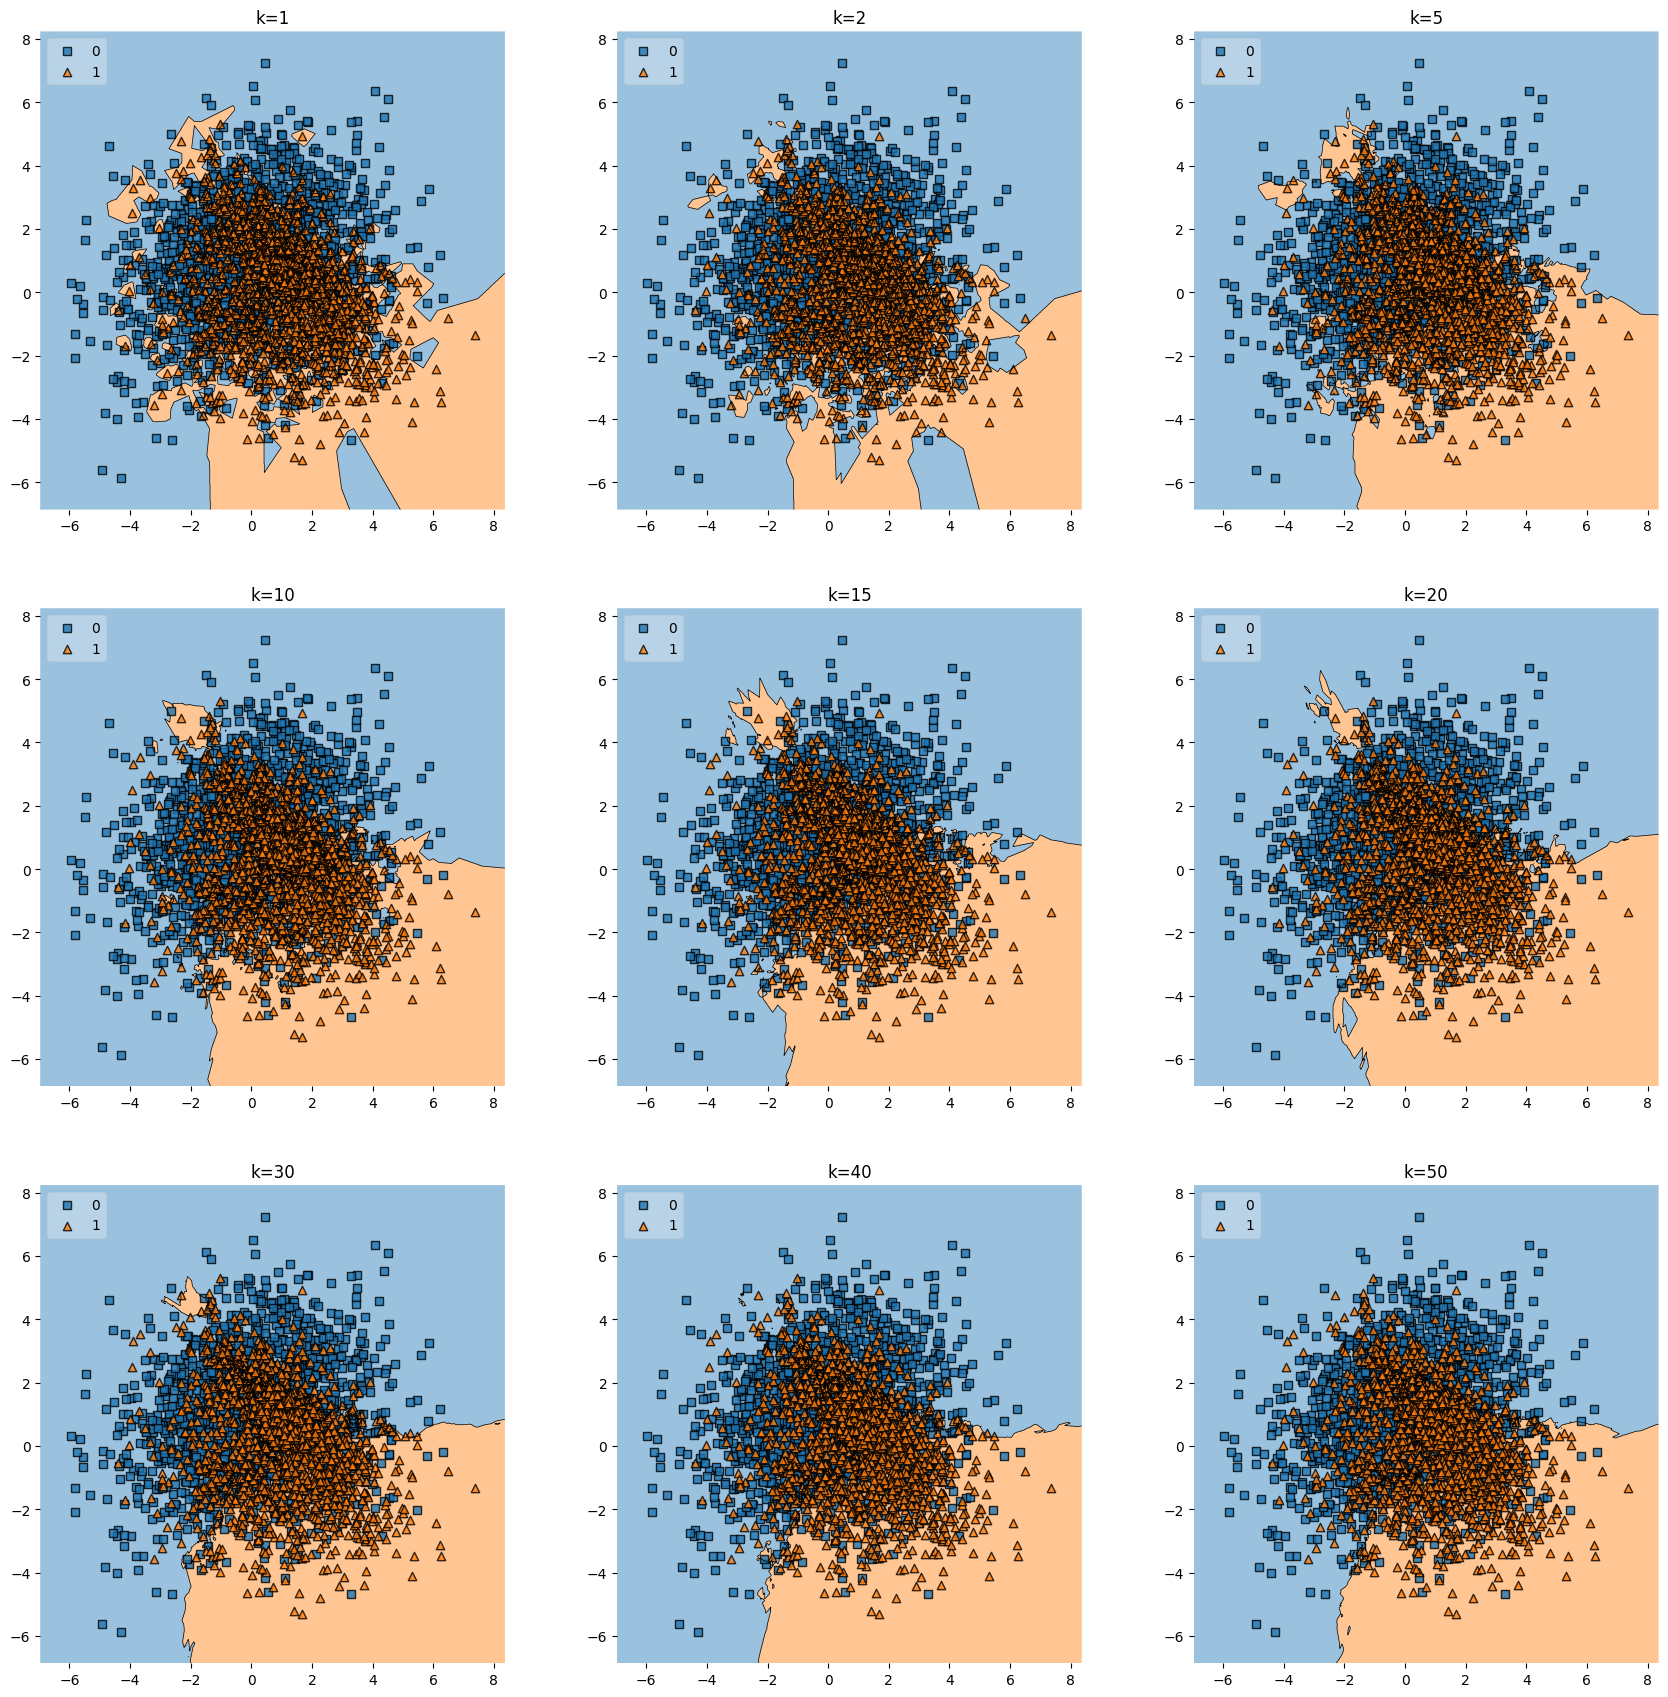

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tqdm import tqdm

X = apples[best_features].values
y = apples['Quality'].apply(lambda x: 1 if x == 'good' else 0).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = [1,  2,  5,  10,  15,  20,  30,  40,  50]

fig, axs = plt.subplots(3,  3, figsize=(18,  18))
fig.tight_layout(pad=5.0)

for i, k in enumerate(tqdm(k_values)):
    row = i //  3
    col = i %  3

    ax = axs[row, col]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    plot_decision_regions(X_train, y_train, clf=knn, legend=2, ax=ax)

    ax.set_title(f'k={k}')

plt.show()


## Задача 1.3 (1 балл)
Функция plot_decision_regions удобна тем, что ее можно использовать для визуализации разных алгоритмов классификации.

Выберите два параметра, которые кажутся вам наиболее важными при оценке качества яблок. Используйте их, чтобы построить алгоритм решающего дерева.
Также постройте решающее дерево для признаков, которые были отобраны в пункте 1.1.
Создайте поле 1х2 и визуализируйте полученные результаты. Каждый график озаглавьте.


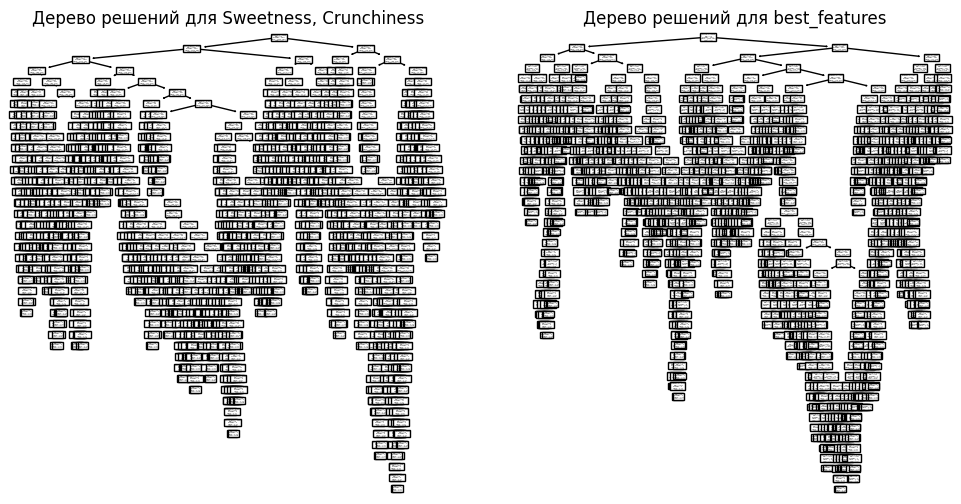

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

selected_features = ['Sweetness', 'Crunchiness']
X = apples[selected_features]
y = apples['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axs = plt.subplots(1,  2, figsize=(12,  6))

plot_tree(tree_clf, feature_names=selected_features, class_names=['good', 'bad'], ax=axs[0])
axs[0].set_title('Дерево решений для Sweetness, Crunchiness')

#---
X = apples[best_features]
y = apples['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

plot_tree(tree_clf, feature_names=best_features, class_names=['good', 'bad'], ax=axs[1])
axs[1].set_title('Дерево решений для best_features')

plt.show()


# Задача 2. Визуализация алгоритмов решающего дерева


## Задача 2.1 (1 балл)
Аналогично пункту 1.1, создайте две функции для алгоритмов решающего дерева:

Функцию, которая возвращает два параметра, дающие наибольший accuracy score при применении алгоритма решающего дерева.
Такую же функцию, но которая возвращает три параметра (то есть перебирает все значения не по парам признаков, а по тройкам).


## Задача 2.2 (1 балл)
Создайте три различных двумерных графика для визуализации результатов работы алгоритма случайного леса (из пункта 1 задачи 2.1). Можете использовать любые библиотеки (включая модули graphviz, dtreeviz).



## Задача 2.3 (1 балл)
Аналогично предыдущему пункту, создайте три трехмерных графика (или псевдотрехмерных — двумерных, где цветом отображено третье измерение) для того алгоритма случайного леса с тремя параметрами, который вы получили во втором пункте задачи 2.1.



# Задача 3. Градиентный спуск для функции одной переменной (2 балла)
На занятиях мы разбирали создание визуализации алгоритмов градиентного спуска. Напишите с нуля свой алгоритм градиентного спуска. Создайте визуализацию работы градиентного спуска на каждой итерации для следующей функции:
$$f(x) = x^6 - 3*x^4 + 2*x^2 + 1$$

Визуализацию снабдите названием, подписями к осям, а также добавьте текст с номером итерации (цвет выбирайте в зависимости от читаемости). Положение точки градиентного спуска на итерации n можно изобразить в качестве Scatter plot или Line plot.

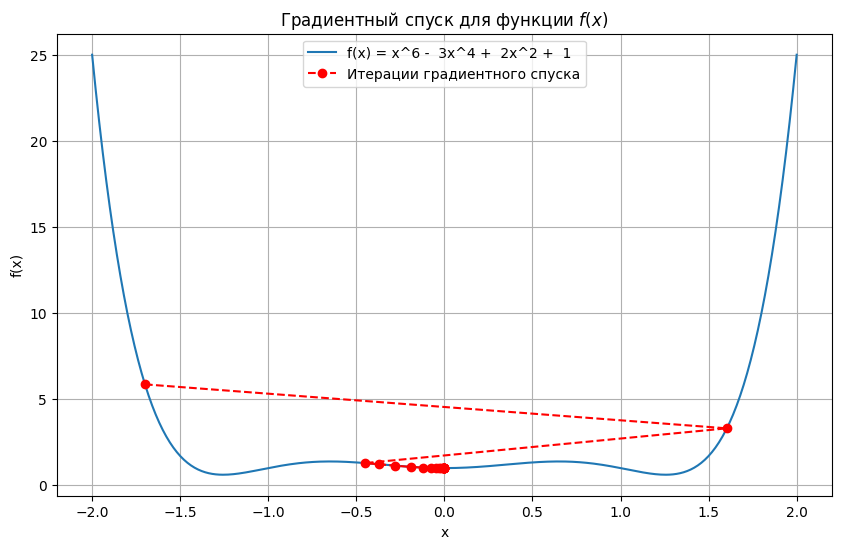

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Определение функции
def f(x):
    return x**6 -  3*x**4 +  2*x**2 +  1

# Определение производной функции
def df(x):
    return  6*x**5 -  12*x**3 +  4*x

# Начальное приближение
x0 =  -1.7

# Количество итераций
n_iter =  20

# Шаг градиентного спуска
alpha =  0.1

def gradient_descent(x0, n_iter, alpha):
    x = x0
    x_values = [x]
    for _ in range(n_iter):
        grad = df(x)
        x -= alpha * grad
        x_values.append(x)
    return x_values

x_values = gradient_descent(x0, n_iter, alpha)

x = np.linspace(-2,  2,  400)
y = f(x)

plt.figure(figsize=(10,  6))
plt.plot(x, y, label='f(x) = x^6 -  3x^4 +  2x^2 +  1')

# Визуализация градиентного спуска
plt.plot(x_values, [f(x) for x in x_values], color='red', linestyle='--', marker='o', label='Итерации градиентного спуска')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Градиентный спуск для функции $f(x)$')
plt.legend()
plt.grid(True)
plt.show()

# Задача 4. Визуализация градиентного спуска для трехмерной функции (4 балла)
В теории оптимизации есть достаточно известная функция Розенброка. Она используется для проверки производительности алгоритмов.

Постройте трехмерную визуализацию (plt.surface() или ее двумерные аналоги, например, plt.contourf()), работы градиентного спуска для функции Розенброка:
$$f(x) = (1-x_1)^2 + 100*(x_2-{x_1}^2)^2$$

В качестве визуализации текущего расположения градиентного спуска лучше использовать линейный график красного цвета, чтобы отследить блуждания функции в трехмерном пространстве. Визуализацию снабдите названием, подписями к осям, а также добавьте текст с номером итерации (цвет выбирайте в зависимости от читаемости). Положение точки градиентного спуска на итерации n лучше изобразить через `Line plot`.

Пример работы plt.contourf():

```
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

fig, (ax1, ax2) = plt.subplots(ncols=2)

ax1.set_title("origin='upper'")
ax2.set_title("origin='lower'")
ax1.contourf(h, levels=np.arange(5, 70, 5), extend='both', origin="upper")
cs2 = ax2.contourf(h, levels=np.arange(5, 70, 5), extend='both', origin="lower")
fig.colorbar(cs2, ax=ax2, shrink=0.9)

plt.show()
```